In [27]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.linalg import eigh
from keras.datasets import mnist
import ipdb

# Part (a): Visualization

In this exercise, you need to implement the dimensionality reduction technique PCA on the MNIST dataset from scratch and visualize the results. In the MNIST dataset, you would find information on handwritten digits (0-9) stored in the form of a 60,000x28x28 array (60,000 samples of a 28x28 image), where each element of the array represents a single pixel (which varies from 0 to 1, where the black color is represented by 1 and white by 0 and middle values represent the shades of grey).

**1. Using the started code provided, find the first 2 principal components PCA_1 and PCA_2**

In [3]:
# Load the MNIST Dataset

(X, y), _ = mnist.load_data()

nsamples, nx, ny = X.shape
X = X.reshape((nsamples,nx*ny))

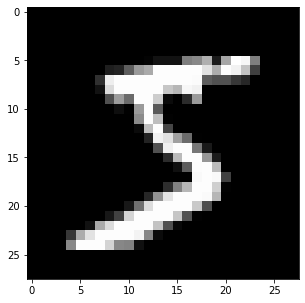

In [4]:
# Plotting a random sample data point

plt.figure(figsize = (20, 5))
grid_data = np.array(X[0]).reshape(28, 28)
plt.imshow(grid_data, interpolation = None, cmap = 'gray')
plt.show()

In [5]:
# Standardize the data and find the co-variance matrix
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

In [6]:
covar_mat = np.matmul(X_norm.T, X_norm)

In [7]:
# Find the top two eigen-values and corresponding eigenvectors

values, vectors = eigh(covar_mat, eigvals = (782, 783))
vectors = vectors.T

print("Dimensions of Eigen vector: ", vectors.shape)

Dimensions of Eigen vector:  (2, 784)


**2. Project the data onto these components and visualize it using a scatter plot**

In [10]:
# Find the principal components PC1 and PC2
projected_features = np.matmul(vectors, X.T)

print("Dimensions of the Principal Components: ", projected_features.shape)

Dimensions of the Principal Components:  (2, 60000)


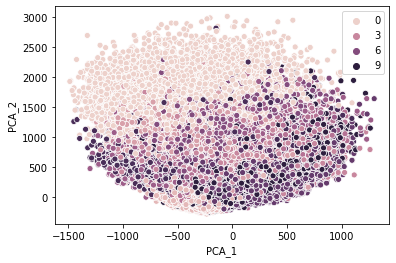

In [14]:
# Visulaize the obtained dataframe using scatterplot
sns.scatterplot(x=projected_features[0], y=projected_features[1], hue=y)
plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.legend()
plt.show()

# Part II: Principal Component Regression and comparison with random projections


While you have already seen many properties of PCA so far, in this question we investigate if random projections are a good idea for dimensionality reduction. A few advantages of random projections over PCA can be: 
1. PCA is expensive when the underlying dimension is high and the number of principal components is also large (however note that there are several very fast algorithms dedicated to doing PCA)
2. PCA requires you to have access to the feature matrix for performing computations. The second requirement of PCA is a bottle neck when you want to take only a low dimensional measurement of a very high dimensional data, e.g., in FMRI and in compressed sensing. In such cases, one needs to design a projection scheme before seeing the data. We now turn to a concrete setting to study a few properties of PCA and random projections.

Suppose you are given $n$ points $x_1,..., x_n$ in $R^D$. Define the $n$ x $d$ matrix 

$$
X = 
\begin{bmatrix}
x_1^\top \\
x_2^\top \\
\vdots \\
x_n^\top
\end{bmatrix}
$$
where each row of the matrix represents one of the given points. In this problem, we will consider a few low-dimensional linear embedding $Ψ: R^d ⟶ R^k$ that maps vectors from $R^d$ to $R^k$.


**Recall: PCA**

Let $X = U \Sigma V^T$ denote the singular value decomposition of the matrix X. Assume that $n ≥ d$ and let $σ_1, σ_2,..., σ_d$ denote the singular values of $X$.Let $v_1, v_2,..., v_d$ denote the columns of the matrix V. 

Then the k-dimensional PCA embedding is expressed as: $Ψ_{\text{PCA}} (x) = (v_1^T x,..., v_k^T x)^T$. Note that this embedding projects a d-dimensional vector on the linear span of the set ${v_1,..., v_k}$ and that $v_i^T x$ denotes the $i$-th coordinate of the projected vector in the new space.

**Random Projection**

Consider the random matrix $\mathbf{J} \in \mathbb{R}^{k \times d}$ with each of its entry being i.i.d. $\mathcal{N}(0,1)$ and consider the map $\psi_{\mathbf{J}}: \mathbb{R}^{d} \mapsto \mathbb{R}^{k}$ such that $\psi_{\mathbf{J}}(\mathbf{x})=\frac{1}{\sqrt{k}} \mathbf{J} \mathbf{x}$. 

In the next few parts, we visualize the effect of PCA projections and random projections on a
classification task. You are given 3 datasets in the data folder and a starter code.

1. Use the starter code to load the three datasets one by one. Note that there are two unique values in y. **Visualize the features of X these datasets using (1) Top-2 PCA components, and (2) 2-dimensional random projections (as described above). Use the code to project the features to 2 dimensions and then scatter plot the 2 features with a different color for each class**. Note that you will obtain 2 plots for each dataset (total 6 plots for this part). **Do you observe a difference in PCA vs random projections? Do you see a trend in the three datasets?**

In [15]:
## Random Projections ##
def random_matrix(d, k):
    '''
    d = original dimension
    k = projected dimension
    '''
    return 1./np.sqrt(k)*np.random.normal(0, 1, (d, k))

def random_proj(X, k):
    _, d= X.shape
    return X.dot(random_matrix(d, k))

    

In [20]:
## PCA and projections ##
def my_pca(X, k):
    '''
    compute PCA components
    X = data matrix (each row as a sample)
    k = #principal components
    '''
    n, d = X.shape
    assert(d>=k)
    _, _, Vh = np.linalg.svd(X)    
    V = Vh
    return V[:, :k]

def pca_proj(X, k):
    '''
    compute projection of matrix X
    along its first k principal components
    '''
    P = my_pca(X, k)
    # P = P.dot(P.T)
    return X.dot(P)

In [21]:
# to load the data:
data = np.load('./data1.npz')
X_one = data['X']
y_one = data['y']
n_one, d_one = X_one.shape

data = np.load('./data2.npz')
X_two = data['X']
y_two = data['y']
n_two, d_two = X_two.shape

data = np.load('./data3.npz')
X_three = data['X']
y_three = data['y']
n_three, d_three = X_three.shape

n_trials = 10  # to average for accuracies over random projections

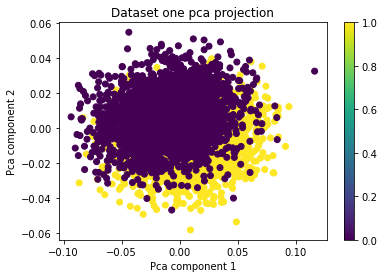

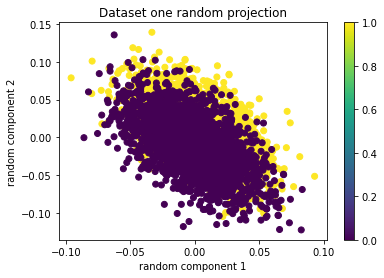

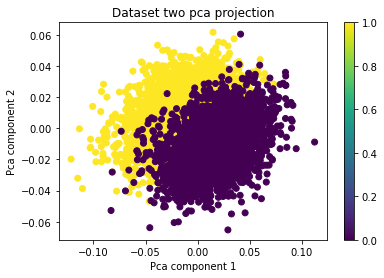

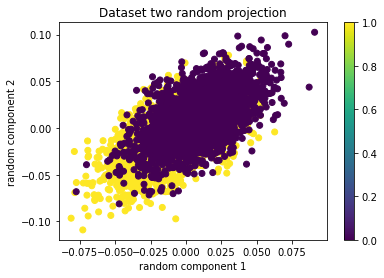

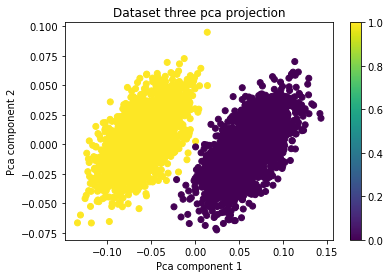

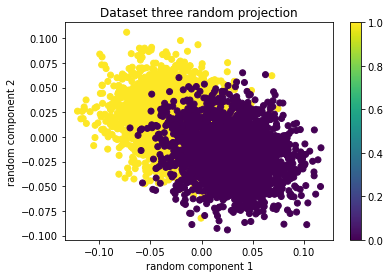

In [22]:
# Using PCA and Random Projection for:
# Visualizing the datasets 
def visualize(X, y, datasetNumber):
    pca_projected = pca_proj(X, 2)
    random_projected = random_proj(X, 2)
    y_color = [0 if x == -1.0 else x for x in y]
    plt.scatter(pca_projected[:, 0], pca_projected[:, 1], c = y_color)
    title = "Dataset " + datasetNumber + " pca projection"
    plt.title(title)
    plt.xlabel("Pca component 1")
    plt.ylabel("Pca component 2")
    plt.colorbar()
    plt.show()
    plt.scatter(random_projected[:, 0], random_projected[:, 1], c = y_color)
    plt.title("Dataset " + datasetNumber + " random projection")
    plt.xlabel("random component 1")
    plt.ylabel("random component 2")
    plt.colorbar()
    plt.show()

visualize(X_one, y_one, "one")
visualize(X_two, y_two, "two")
visualize(X_three, y_three, "three")

# And computing the SVD of the feature matrix

# plt.plot, plt.scatter would be useful for plotting

2. For each dataset, we will now fit a linear model on different projections of features to perform classification. The code for fitting a linear model with projected features and predicting a label for a given feature, is given to you. Use these functions and write a code that does prediction in the following way: (1) Use top k-PCA features to obtain one set of results, and (2) Use k-dimensional random projection to obtain the second set of results (take average accuracy over 10 random projections for smooth curves). Use the projection functions given in the starter code to select these features. You should vary k from 1 to d where d is the dimension of each feature xi. **Plot the accuracy for PCA and Random projection as a function of k. Comment on the observations on these accuracies as a function of k and across different datasets.**

In [33]:
######### LINEAR MODEL FITTING ############

def rand_proj_accuracy_split(X, y, k):
    '''
    Fitting a k dimensional feature set obtained
    from random projection of X, versus y
    for binary classification for y in {-1, 1}
    '''
    # test train split
    _, d = X.shape
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
    
    # random projection
    J = random_matrix(d, k)
    rand_proj_X = X_train.dot(J)
    
    # fit a linear model
    line = sklearn.linear_model.LinearRegression(fit_intercept=False)
    line.fit(rand_proj_X, y_train)
    
    # predict y
    y_pred=line.predict(X_test.dot(J))
    
    # return the test error
    return 1-np.mean(np.sign(y_pred)!= y_test)

def pca_proj_accuracy(X, y, k):
    '''
    Fitting a k dimensional feature set obtained
    from PCA projection of X, versus y
    for binary classification for y in {-1, 1}
    '''
    # test-train split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
    
    # pca projection
    P = my_pca(X_train, k)
    pca_proj_X = X_train.dot(P)
                
    # fit a linear model
    line = sklearn.linear_model.LinearRegression(fit_intercept=False)
    line.fit(pca_proj_X, y_train)
    
     # predict y
    y_pred=line.predict(X_test.dot(P))

    # return the test error
    return 1-np.mean(np.sign(y_pred)!= y_test)

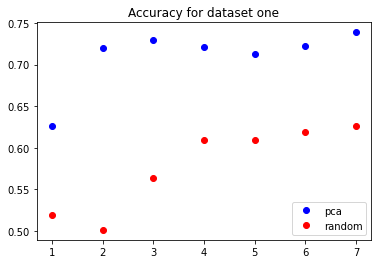

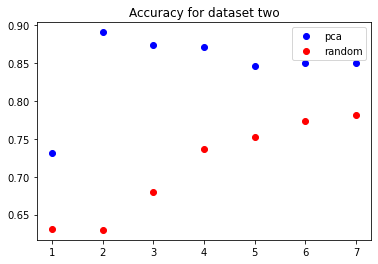

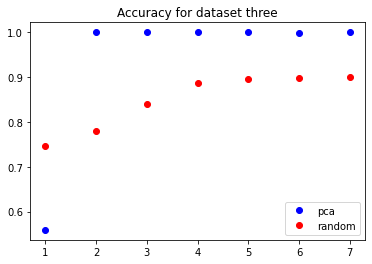

In [36]:
# Computing the accuracies over different datasets.
def plotAccuracy(X, y, d, datasetNumber):
    pca_accuracy = [0.0 for x in range(d)]
    random_accuracy = [0.0 for x in range(d)]
    
    for k in range(1, d+1):
        pca_accuracy[k-1] = pca_proj_accuracy(X, y, k)
        
        for i in range (1, n_trials):
            random_accuracy[k-1] += rand_proj_accuracy_split(X, y, k)
        random_accuracy[k-1] = random_accuracy[k-1]/n_trials
    
    plt.title("Accuracy for dataset " + datasetNumber)
    plt.plot(range(1, d+1), pca_accuracy, 'bo', label = 'pca')
    plt.plot(range(1, d+1), random_accuracy, 'ro', label = 'random')
    plt.legend()
    plt.show()

plotAccuracy(X_one, y_one, d_one, "one")
plotAccuracy(X_two, y_two, d_two, "two")
plotAccuracy(X_three, y_three, d_three, "three")

# Don't forget to average the accuracy for multiple
# random projections to get a smooth curve.

3. Now plot the singular values for the feature matrices of the three datasets. **Do you observe a pattern across the three datasets? How does it help to explain the performance of PCA observed in the previous parts?**

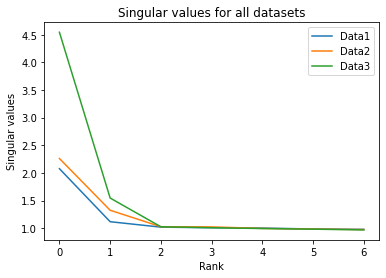

In [37]:
_,sigma_one,_ = np.linalg.svd(X_one)
plt.plot(range(len(sigma_one)), sigma_one)
plt.title("Singular values for all datasets")
plt.xlabel("Rank")
plt.ylabel("Singular values")

_,sigma,_ = np.linalg.svd(X_two)
plt.plot(range(len(sigma)), sigma)

_,sigma,_ = np.linalg.svd(X_three)
plt.plot(range(len(sigma)), sigma)

plt.legend(['Data1', 'Data2', 'Data3'])
plt.show()